In [1]:
import pandas as pd
import random
import os
import re
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None
# pd.options.display.max_rows = None


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [2]:
df = pd.read_csv('gk-data.csv', encoding='cp949')
df

,name,position,강화,max,min,only_one,출생,리그,생년,생월,생일,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,스피드,위치선정
0,이운재,GK,1,0,1,0,한국,한국,1973,4,26,182,82,보통,유명선수,89,86,92,89,93,39,93
1,이운재,GK,1,1,0,0,한국,한국,1973,4,26,182,82,보통,유명선수,104,102,109,96,105,57,108
2,김병지,GK,1,0,1,0,한국,한국,1970,4,8,184,78,보통,유명선수,89,92,89,88,89,61,93
3,김병지,GK,1,1,0,0,한국,한국,1970,4,8,184,78,보통,유명선수,97,101,97,96,97,59,101
4,조현우,GK,1,0,1,0,한국,한국,1991,9,25,189,75,마름,일반선수,84,85,81,69,92,61,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,A. 사빈,GK,1,0,0,1,러시아,러시아,1999,8,30,193,94,보통,일반선수,55,60,56,57,59,25,52
99,A. 바슈틴,GK,1,1,0,0,러시아,스웨덴,1995,3,4,190,80,보통,일반선수,63,66,58,61,67,35,62
100,A. 바슈틴,GK,1,0,1,0,러시아,스웨덴,1995,3,4,190,80,보통,일반선수,61,64,57,60,65,35,61
101,A. 미트류스킨,GK,1,0,0,1,러시아,러시아,1996,2,8,189,79,보통,일반선수,59,63,56,61,60,35,63


In [3]:
sa = pd.read_csv('result5.csv', encoding='cp949')
sa

,name,position,강화,max,min,only_one,출생,리그,생년,생월,생일,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도
0,사리체프,GK,1,0,1,0,러시아,한국,1960,1,12,193,87,보통,일반선수,70.335,69.450220,71.648570,67.132980,72.518331
1,사리체프,GK,1,1,0,0,러시아,한국,1960,1,12,193,87,보통,일반선수,78.240,77.514300,79.796875,74.112220,80.227217
2,사리체프,GK,1,0,1,0,러시아,한국,1960,1,12,193,87,보통,유명선수,71.895,71.041600,73.256584,68.510284,74.039626
3,사리체프,GK,1,1,0,0,러시아,한국,1960,1,12,193,87,보통,유명선수,79.250,78.544624,80.837960,75.003944,81.212162


In [4]:
# 특정 칼럼만 추출해서 새로운 데이터프레임 생성
selected_columns = ['name', 'position', '강화', 'max', 'min', 'only_one', '출생', '리그',
                    '생년', '생월', '생일', '키', '몸무게', '체격', '명성', '능력치',
                    '다이빙', '핸들링', '킥', '반응속도', '스피드']

df2 = df[selected_columns]
df2

,name,position,강화,max,min,only_one,출생,리그,생년,생월,생일,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,스피드
0,이운재,GK,1,0,1,0,한국,한국,1973,4,26,182,82,보통,유명선수,89,86,92,89,93,39
1,이운재,GK,1,1,0,0,한국,한국,1973,4,26,182,82,보통,유명선수,104,102,109,96,105,57
2,김병지,GK,1,0,1,0,한국,한국,1970,4,8,184,78,보통,유명선수,89,92,89,88,89,61
3,김병지,GK,1,1,0,0,한국,한국,1970,4,8,184,78,보통,유명선수,97,101,97,96,97,59
4,조현우,GK,1,0,1,0,한국,한국,1991,9,25,189,75,마름,일반선수,84,85,81,69,92,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,A. 사빈,GK,1,0,0,1,러시아,러시아,1999,8,30,193,94,보통,일반선수,55,60,56,57,59,25
99,A. 바슈틴,GK,1,1,0,0,러시아,스웨덴,1995,3,4,190,80,보통,일반선수,63,66,58,61,67,35
100,A. 바슈틴,GK,1,0,1,0,러시아,스웨덴,1995,3,4,190,80,보통,일반선수,61,64,57,60,65,35
101,A. 미트류스킨,GK,1,0,0,1,러시아,러시아,1996,2,8,189,79,보통,일반선수,59,63,56,61,60,35


In [5]:
# X = df2.drop(['능력치'], axis = 1)
# y = df2['능력치']
# X = df2.drop(['다이빙'], axis = 1)
# y = df2['다이빙']
# X = df2.drop(['핸들링'], axis = 1)
# y = df2['핸들링']
# X = df2.drop(['킥'], axis = 1)
# y = df2['킥']
# X = df2.drop(['반응속도'], axis = 1)
# y = df2['반응속도']
X = df2.drop(['스피드'], axis = 1)
y = df2['스피드']



# 데이터 셋을 셔플하지 않고 train/test로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Pycaret

In [6]:
# 분류 작업을 위한 pycaret 초기화
clf = setup(X_train, target=y_train, session_id=123)

,Description,Value
0,Session id,123
1,Target,스피드
2,Target type,Regression
3,Original data shape,"(82, 21)"
4,Transformed data shape,"(82, 32)"
5,Transformed train set shape,"(57, 32)"
6,Transformed test set shape,"(25, 32)"
7,Ordinal features,1
8,Numeric features,14
9,Categorical features,6


In [7]:
best_model = compare_models(n_select = 3)

# 특정 모델들만 비교 (예: LightGBM, XGBoost, Random Forest)
# best_model = compare_models(n_select = 3, include=['huber', 'dummy', 'en', 'knn', 'lasso', 'ada', 'lightgbm', 'catboost', 'lightgbm', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.4854,167.2585,11.9430,-0.3031,0.3412,0.4436,0.1140
knn,K Neighbors Regressor,10.2327,174.9868,12.5328,-0.5460,0.3496,0.4610,0.0650
en,Elastic Net,10.4982,206.0975,13.2820,-0.6751,0.3822,0.4706,0.0460
dummy,Dummy Regressor,12.2584,225.6270,14.6158,-0.8260,0.3913,0.4815,0.0510
lasso,Lasso Regression,11.1098,234.8575,14.0597,-0.8502,0.4171,0.4925,0.0470
llar,Lasso Least Angle Regression,11.1140,234.9739,14.0639,-0.8509,0.4172,0.4925,0.0460
omp,Orthogonal Matching Pursuit,11.3216,243.8622,14.2980,-0.8980,0.4325,0.4998,0.0500
huber,Huber Regressor,11.5092,243.2081,14.4833,-0.9649,0.4318,0.5052,0.0510
rf,Random Forest Regressor,11.7444,249.1450,14.6146,-0.9930,0.4145,0.5147,0.1000
br,Bayesian Ridge,11.5034,248.6089,14.4934,-1.0513,0.4357,0.5032,0.0580


In [8]:
b1 = best_model[0]
b2 = best_model[1]
b3 = best_model[2]

predictions_1 = predict_model(b1,data=X_test)
predictions_2 = predict_model(b2,data=X_test)
predictions_3 = predict_model(b3,data=X_test)

In [9]:
b1

LGBMRegressor(n_jobs=-1, random_state=123)

In [10]:
predictions_1

,name,position,강화,max,min,only_one,출생,리그,생년,생월,...,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,prediction_label
30,노동건,GK,1,0,0,1,한국,한국,1991,10,...,192,88,보통,일반선수,87,94,84,77,91,50.393810
67,E. 코보제프,GK,1,0,0,1,러시아,러시아,1990,1,...,188,81,보통,일반선수,60,66,57,60,65,42.717570
62,이고리 아킨페예프,GK,1,1,0,0,러시아,러시아,1986,4,...,186,78,보통,유명선수,101,105,92,100,107,54.130403
47,윤평국,GK,1,1,0,0,한국,한국,1992,2,...,189,85,보통,일반선수,85,85,89,76,88,62.963199
42,오승훈,GK,1,1,0,0,한국,한국,1988,6,...,192,79,보통,일반선수,87,91,85,84,90,48.773123
40,양형모,GK,1,1,0,0,한국,한국,1991,7,...,185,84,보통,일반선수,101,106,100,93,102,60.716070
90,I. 스비노프,GK,1,0,0,1,러시아,러시아,2000,9,...,190,81,마름,일반선수,57,59,59,57,60,38.922451
45,유상훈,GK,1,0,1,0,한국,한국,1989,5,...,194,84,보통,일반선수,82,82,83,76,87,59.180024
10,김영광,GK,1,1,0,0,한국,한국,1983,6,...,184,86,보통,일반선수,94,89,94,85,99,50.304895
0,이운재,GK,1,0,1,0,한국,한국,1973,4,...,182,82,보통,유명선수,89,86,92,89,93,50.009381


In [11]:
# 인덱스를 기준으로 레프트 조인 수행
result = predictions_1.join(y_test, how='left')
result

,name,position,강화,max,min,only_one,출생,리그,생년,생월,...,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,prediction_label,스피드
30,노동건,GK,1,0,0,1,한국,한국,1991,10,...,88,보통,일반선수,87,94,84,77,91,50.393810,58
67,E. 코보제프,GK,1,0,0,1,러시아,러시아,1990,1,...,81,보통,일반선수,60,66,57,60,65,42.717570,45
62,이고리 아킨페예프,GK,1,1,0,0,러시아,러시아,1986,4,...,78,보통,유명선수,101,105,92,100,107,54.130403,60
47,윤평국,GK,1,1,0,0,한국,한국,1992,2,...,85,보통,일반선수,85,85,89,76,88,62.963199,50
42,오승훈,GK,1,1,0,0,한국,한국,1988,6,...,79,보통,일반선수,87,91,85,84,90,48.773123,59
40,양형모,GK,1,1,0,0,한국,한국,1991,7,...,84,보통,일반선수,101,106,100,93,102,60.716070,63
90,I. 스비노프,GK,1,0,0,1,러시아,러시아,2000,9,...,81,마름,일반선수,57,59,59,57,60,38.922451,37
45,유상훈,GK,1,0,1,0,한국,한국,1989,5,...,84,보통,일반선수,82,82,83,76,87,59.180024,55
10,김영광,GK,1,1,0,0,한국,한국,1983,6,...,86,보통,일반선수,94,89,94,85,99,50.304895,78
0,이운재,GK,1,0,1,0,한국,한국,1973,4,...,82,보통,유명선수,89,86,92,89,93,50.009381,39


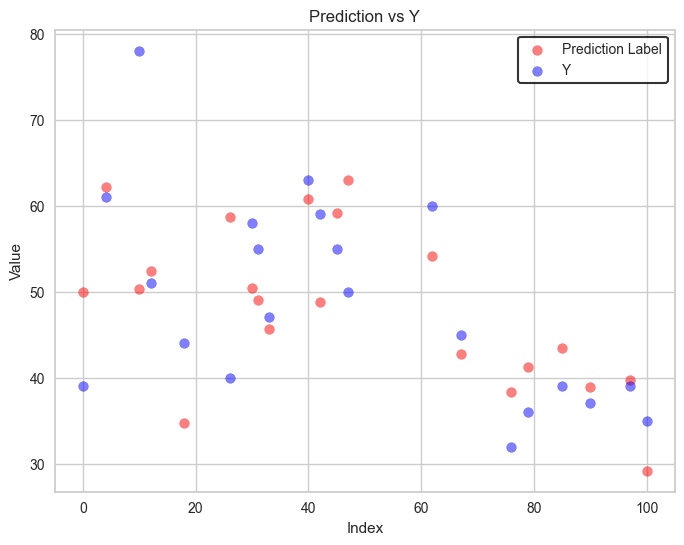

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(result.index, result['prediction_label'], color='red', alpha=0.5, label='Prediction Label')
plt.scatter(result.index, result['스피드'], color='blue', alpha=0.5, label='Y')

plt.title('Prediction vs Y')
plt.xlabel('Index')
plt.ylabel('Value')

legend = plt.legend(frameon=True)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
    
plt.grid(True)
plt.show()

In [13]:
sa1 = predict_model(b1,data=sa)
sa1

,name,position,강화,max,min,only_one,출생,리그,생년,생월,...,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,prediction_label
0,사리체프,GK,1,0,1,0,러시아,한국,1960,1,...,193,87,보통,일반선수,70.334999,69.450218,71.648567,67.132980,72.518333,40.918388
1,사리체프,GK,1,1,0,0,러시아,한국,1960,1,...,193,87,보통,일반선수,78.239998,77.514297,79.796875,74.112221,80.227219,41.148587
2,사리체프,GK,1,0,1,0,러시아,한국,1960,1,...,193,87,보통,유명선수,71.894997,71.041603,73.256584,68.510284,74.039627,40.918388
3,사리체프,GK,1,1,0,0,러시아,한국,1960,1,...,193,87,보통,유명선수,79.250000,78.544624,80.837959,75.003944,81.212158,41.148587


In [14]:
# sa1['prediction_label'] = sa1['prediction_label'].round()
# sa1.rename(columns={'prediction_label': '능력치'}, inplace=True)
# sa1.rename(columns={'prediction_label': '다이빙'}, inplace=True)
# sa1.rename(columns={'prediction_label': '핸들링'}, inplace=True)
# sa1.rename(columns={'prediction_label': '킥'}, inplace=True)
# sa1.rename(columns={'prediction_label': '반응속도'}, inplace=True)
sa1.rename(columns={'prediction_label': '스피드'}, inplace=True)
sa1

,name,position,강화,max,min,only_one,출생,리그,생년,생월,...,키,몸무게,체격,명성,능력치,다이빙,핸들링,킥,반응속도,스피드
0,사리체프,GK,1,0,1,0,러시아,한국,1960,1,...,193,87,보통,일반선수,70.334999,69.450218,71.648567,67.132980,72.518333,40.918388
1,사리체프,GK,1,1,0,0,러시아,한국,1960,1,...,193,87,보통,일반선수,78.239998,77.514297,79.796875,74.112221,80.227219,41.148587
2,사리체프,GK,1,0,1,0,러시아,한국,1960,1,...,193,87,보통,유명선수,71.894997,71.041603,73.256584,68.510284,74.039627,40.918388
3,사리체프,GK,1,1,0,0,러시아,한국,1960,1,...,193,87,보통,유명선수,79.250000,78.544624,80.837959,75.003944,81.212158,41.148587


In [15]:
# sa1.to_csv('result1.csv', index=False, encoding='cp949')
# sa1.to_csv('result2.csv', index=False, encoding='cp949')
# sa1.to_csv('result3.csv', index=False, encoding='cp949')
# sa1.to_csv('result4.csv', index=False, encoding='cp949')
# sa1.to_csv('result5.csv', index=False, encoding='cp949')
sa1.to_csv('result6.csv', index=False, encoding='cp949')
print("done")

done
